# Mulit Task Learning NLP


Emotions
0. Sadness
1. Joy
2. Love
3. Anger
4. Fear
5. Surprise

Violence
0. Harmful_Traditional_practice
1. Physical_violence
2. economic_violence
3. emotional_violence
4. sexual_violence

Hate
0. Hate Speech
1. Offensive Speech
2. Neither

**1. Loading the Data**


In [1]:
import pandas as pd
import numpy as np

In [2]:
emotion_df = pd.read_csv('emotions.csv')

In [3]:
hate_df = pd.read_csv('hate.csv')

In [4]:
violence_df = pd.read_csv('violence.csv')

**2. Data Preprocessing**

In [5]:
#dropping unwanted
emotion_df.drop(columns=['Unnamed: 0'], inplace=True)
violence_df.drop(columns=['Tweet_ID'], inplace=True)
hate_df = hate_df[['tweet', 'class']]

In [6]:
emotion_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [7]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [8]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [9]:
emotion_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [10]:
# renaming columns
violence_df.rename(columns = {'tweet':'text', 'type':'label'}, inplace=True)
hate_df.rename(columns = {'tweet':'text', 'class':'label'}, inplace=True)

In [11]:
# checking for null values
emotion_df.isna().sum(), violence_df.isna().sum(), hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [12]:
emotion_df.shape, violence_df.shape, hate_df.shape

((416809, 2), (39650, 2), (24783, 2))

Extracting 12 thousand rows randomly form all datasets

In [13]:
emotion_df['label'].value_counts(), violence_df['label'].value_counts(), hate_df['label'].value_counts()

(label
 1    141067
 0    121187
 3     57317
 4     47712
 2     34554
 5     14972
 Name: count, dtype: int64,
 label
 sexual_violence                 32648
 Physical_violence                5946
 emotional_violence                651
 economic_violence                 217
 Harmful_Traditional_practice      188
 Name: count, dtype: int64,
 label
 1    19190
 2     4163
 0     1430
 Name: count, dtype: int64)

In [14]:
e_df = pd.DataFrame()
for i in range(6):
  subset = emotion_df[emotion_df['label'] == i].sample(n=2000, random_state=42)
  e_df = pd.concat([e_df, subset])

In [15]:
e_df.shape

(12000, 2)

In [16]:
emotion_df = e_df.copy()

In [17]:
emotion_df['label'].value_counts()

,count
label,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000


In [18]:
#we just want 4998 rows from the sexual_violence label
sexual_violence = violence_df[violence_df['label'] == 'sexual_violence'].sample(n=4998, random_state=42)
violence_df = violence_df[violence_df['label'] != 'sexual_violence']
violence_df = pd.concat([violence_df, sexual_violence], axis=0)

In [19]:
violence_df.shape

(12000, 2)

In [20]:
#we just want 6407 rows from offensive speech text as label 1
offensive_speech = hate_df[hate_df['label'] == 1].sample(n=6407, random_state=42)
hate_df = hate_df[hate_df['label'] != 1]
hate_df = pd.concat([hate_df, offensive_speech], axis=0)

In [21]:
hate_df.shape

(12000, 2)

In [22]:
emotion_df.shape, violence_df.shape, hate_df.shape

((12000, 2), (12000, 2), (12000, 2))

In [23]:
# restting the index
emotion_df.reset_index(drop=True, inplace=True),
violence_df.reset_index(drop=True, inplace=True),
hate_df.reset_index(drop=True, inplace=True)

In [24]:
emotion_df.head()

,text,label
0,ive learned to surround myself with women who ...,0
1,i already feel crappy because of this and you ...,0
2,i feel like i have lost mourned and moved past...,0
3,i could write a whole lot more about why im fe...,0
4,i always seem to feel inadequate,0


In [25]:
hate_df.head()

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,""" momma said no pussy cats inside my doghouse """,2
2,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",2
3,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",2
4,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",2


In [26]:
violence_df.head()

,text,label
0,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
1,"Best thing for me to do, is remain silent when...",Physical_violence
2,"My husband will never beat me, Bambam denies r...",Physical_violence
3,"theyre like, i just wanna be a baby maker with...",Physical_violence
4,"I was in England for a week, the longest I’ve ...",Physical_violence


**3. Label Encoding**

In [27]:
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [28]:
label_encoder = LabelEncoder()
violence_df['label'] = label_encoder.fit_transform(violence_df['label'])

In [29]:
violence_df.head()

,text,label
0,"My Husband Beats Me Frequently, Wife Tells Cou...",1
1,"Best thing for me to do, is remain silent when...",1
2,"My husband will never beat me, Bambam denies r...",1
3,"theyre like, i just wanna be a baby maker with...",1
4,"I was in England for a week, the longest I’ve ...",1


**4. Stop Words Removal**

In [30]:
import nltk
from nltk.corpus import stopwords

In [31]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [32]:
#loading the stopwords
stop_words = set(stopwords.words('english'))

In [33]:
len(stop_words)

198

In [34]:
#stopwords removal function
def remove_stopwords(text):
  all_words = nltk.word_tokenize(text)
  filter_words = [word for word in all_words if word.lower() not in stop_words]
  return ' '.join(filter_words)

In [35]:
emotion_df['text'] = emotion_df['text'].apply(remove_stopwords)
violence_df['text'] = violence_df['text'].apply(remove_stopwords)
hate_df['text'] = hate_df['text'].apply(remove_stopwords)

In [36]:
emotion_df.head()

,text,label
0,ive learned surround women lift leave feeling ...,0
1,already feel crappy upset situation doesnt help,0
2,feel like lost mourned moved past tears relati...,0
3,could write whole lot im feeling crappy dont t...,0
4,always seem feel inadequate,0


**5. Tokenization and Padding**

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [38]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotion_df['text'], violence_df['text'], hate_df['text']]))

In [39]:
emotion_sequences = tokenizer.texts_to_sequences(emotion_df['text'])
violence_sequences = tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences = tokenizer.texts_to_sequences(hate_df['text'])

In [40]:
emotion_df['text'].iloc[2]

'feel like lost mourned moved past tears relationship'

In [41]:
emotion_sequences[2:3]

[[1, 5, 321, 11854, 1207, 422, 1093, 385]]

In [42]:
 max_length = 50
 emotion_padded = pad_sequences(emotion_sequences, maxlen=max_length, padding='post')
 violence_padded = pad_sequences(violence_sequences, maxlen=max_length, padding='post')
 hate_padded = pad_sequences(hate_sequences, maxlen=max_length, padding='post')

In [43]:
emotion_padded[2:3]

array([[    1,     5,   321, 11854,  1207,   422,  1093,   385,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]], dtype=int32)

In [44]:
# generating labels in numpy array format
emotion_labels = np.array(emotion_df['label'])
violence_labels = np.array(violence_df['label'])
hate_labels = np.array(hate_df['label'])

**6. Model Defination**

In [45]:
#prepare seprate input for dataset
emotion_input = emotion_padded
violence_input = violence_padded
hate_input = hate_padded

In [46]:
#defining multiple input layers for each task
from tensorflow import keras
emotion_input_layer = keras.layers.Input(shape = (max_length,), name='emotion_input')
violence_input_layer = keras.layers.Input(shape = (max_length,), name='violence_input')
hate_input_layer = keras.layers.Input(shape = (max_length,), name='hate_input')

In [47]:
#use shared embedding layer
embedding_layer = keras.layers.Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 128)

In [48]:
#Apply the embedding layer to each input
emotion_embedding = embedding_layer(emotion_input_layer)
violence_embedding = embedding_layer(violence_input_layer)
hate_embedding = embedding_layer(hate_input_layer)

In [49]:
#shared lstm layer
shared_lstm = keras.layers.LSTM(64, return_sequences=True)

In [50]:
#applying lstm layer
emotion_lstm = shared_lstm(emotion_embedding)
violence_lstm = shared_lstm(violence_embedding)
hate_lstm = shared_lstm(hate_embedding)

In [51]:
#shared global average pooling layer and dropout
shared_pooling = keras.layers.GlobalAveragePooling1D()
shared_dropout = keras.layers.Dropout(0.5)

In [52]:
emotion_features = shared_dropout(shared_pooling(emotion_lstm))
violence_features = shared_dropout(shared_pooling(violence_lstm))
hate_features = shared_dropout(shared_pooling(hate_lstm))

In [53]:
#output layers
emotion_output = keras.layers.Dense(6, activation='softmax', name = 'emotion_output')(emotion_features)
violence_output = keras.layers.Dense(5, activation='softmax', name = 'violence_output')(violence_features)
hate_output = keras.layers.Dense(3, activation='softmax', name = 'hate_output')(hate_features)

In [55]:
#compile the model with multiple inputs and outputs
model = keras.models.Model(inputs=[emotion_input_layer, violence_input_layer, hate_input_layer],
                           outputs=[emotion_output, violence_output, hate_output])

model.compile(optimizer = 'adam',
              loss = {
                  'emotion_output':'sparse_categorical_crossentropy',
                  'violence_output':'sparse_categorical_crossentropy',
                  'hate_output':'sparse_categorical_crossentropy'
              },
              metrics = {
                  'emotion_output':'accuracy',
                  'violence_output':'accuracy',
                  'hate_output':'accuracy'
              })

In [56]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 50, 128)   │  5,350,528 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 50, 64)    │     49,408 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0],  │
│                     │                   │            │ embedding[2][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ lstm[0][0],       │
│ (GlobalAveragePool… │                   │            │ lstm[1][0],       │
│                     │                   │            │ lstm[2][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64)        │          0 │ global_average_p… │
│                     │                   │            │ global_average_p… │
│                     │                   │            │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ dropout[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ dropout[1][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ dropout[2][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,400,846 (20.60 MB)

 Trainable params: 5,400,846 (20.60 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
#training the model with seprate inputs
model.fit(x = {'emotion_input' : emotion_input,
               'violence_input' : violence_input,
               'hate_input' : hate_input},

          y = {'emotion_output' : emotion_labels,
               'violence_output' : violence_labels,
               'hate_output' : hate_labels},

          epochs = 10,
          batch_size = 4)

Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 316s 103ms/step - emotion_output_accuracy: 0.2146 - emotion_output_loss: 1.7581 - hate_output_accuracy: 0.6547 - hate_output_loss: 0.8146 - loss: 2.9782 - violence_output_accuracy: 0.8562 - violence_output_loss: 0.4055
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 306s 98ms/step - emotion_output_accuracy: 0.7387 - emotion_output_loss: 0.7083 - hate_output_accuracy: 0.8650 - hate_output_loss: 0.3916 - loss: 1.1689 - violence_output_accuracy: 0.9738 - violence_output_loss: 0.0690
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 324s 98ms/step - emotion_output_accuracy: 0.9314 - emotion_output_loss: 0.2259 - hate_output_accuracy: 0.9238 - hate_output_loss: 0.2177 - loss: 0.4621 - violence_output_accuracy: 0.9966 - violence_output_loss: 0.0185
Epoch 4/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 335s 102ms/step - emotion_output_accuracy: 0.9604 - emotion_output_loss: 0.1221 - hate_output_accuracy: 0.9680 - hate_output_loss: 0.0977 - loss: 0.2278 - violence_output_accura

**7. Prediction and Evaluation**

In [58]:
predctions = model.predict({'emotion_input' : emotion_input,
                            'violence_input' : violence_input,
                            'hate_input' : hate_input})

375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step


In [60]:
predctions

[array([[9.9993342e-01, 7.2614648e-07, 6.4358358e-07, 2.9623443e-05,
         3.4887671e-05, 5.9765654e-07],
        [9.9999601e-01, 5.3642174e-07, 2.4968730e-07, 1.5980513e-06,
         1.3239330e-06, 3.3355565e-07],
        [9.9999231e-01, 2.3619966e-06, 9.0973850e-07, 3.5149169e-06,
         6.1022109e-07, 2.4676098e-07],
        ...,
        [1.4969984e-05, 2.0189553e-05, 6.7343672e-06, 1.3447640e-05,
         3.6273156e-03, 9.9631733e-01],
        [7.0202404e-08, 3.2217892e-07, 1.6246715e-07, 1.7860037e-07,
         1.5945745e-05, 9.9998325e-01],
        [4.1695521e-06, 9.9777881e-06, 1.2652296e-05, 5.3274430e-06,
         1.3678653e-04, 9.9983120e-01]], dtype=float32),
 array([[2.42294018e-10, 9.99999940e-01, 3.15895053e-11, 1.86396402e-11,
         4.49733410e-11],
        [2.10595843e-07, 9.99999464e-01, 3.39545601e-08, 1.47106896e-08,
         1.87037756e-07],
        [1.19023136e-09, 9.99999940e-01, 5.15973375e-10, 1.84402105e-10,
         6.46482257e-10],
        ...,
      

In [61]:
emotion_pred = np.argmax(predctions[0], axis=1)
violence_pred = np.argmax(predctions[1], axis=1)
hate_pred = np.argmax(predctions[2], axis=1)

In [63]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [64]:
def plot_cm(true, predict, title, labels):
  cf = confusion_matrix(true, predict, normalize='true')
  plt.figure(figsize=(8, 6))
  sns.heatmap(cf, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)
  plt.title(title)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

In [65]:
emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
violence_labels_text = ['sexual_violence', 'physical_violence',  'emotional_violence','Harmful_traditional_practice', 'economic_violence']
hate_labels_text = ['offensive_speech', 'neither', 'hate_speech']

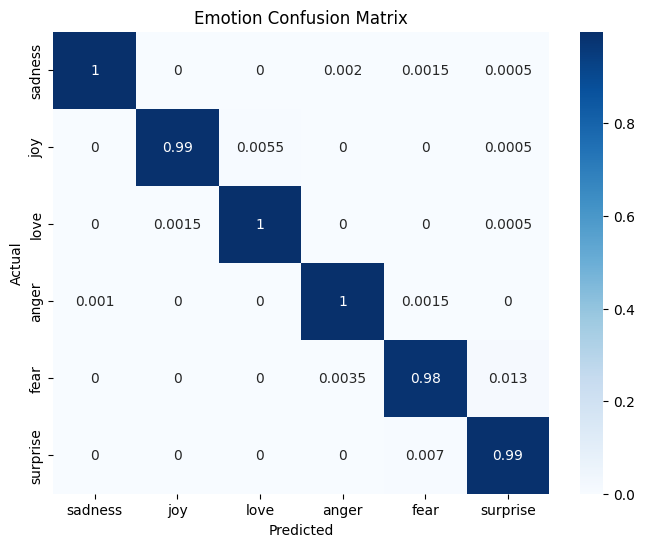

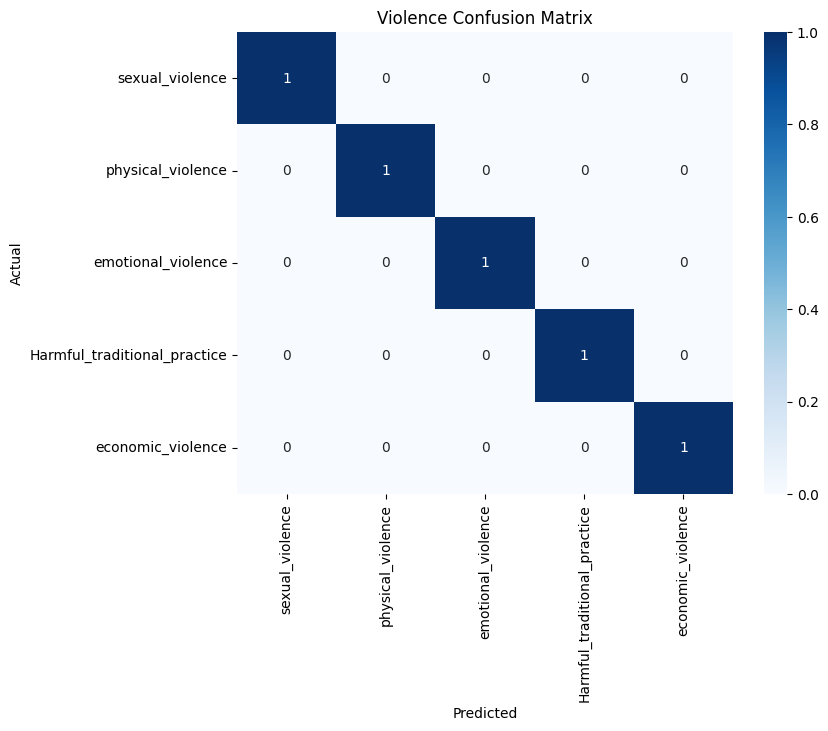

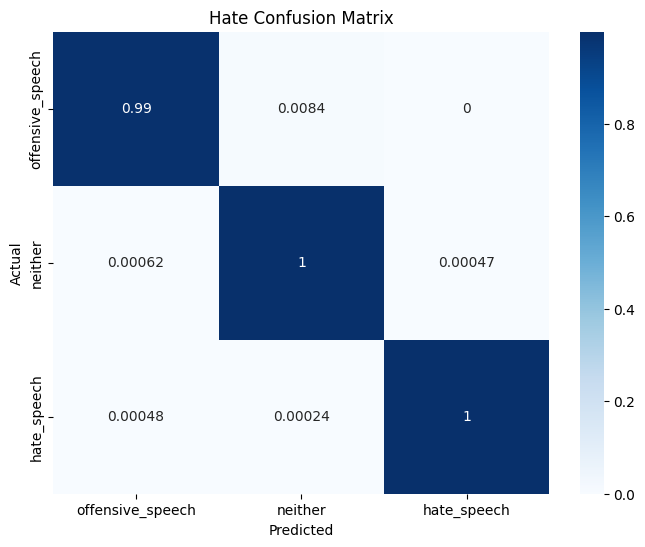

In [66]:
plot_cm(emotion_labels, emotion_pred, 'Emotion Confusion Matrix', emotion_labels_text)
plot_cm(violence_labels, violence_pred, 'Violence Confusion Matrix', violence_labels_text)
plot_cm(hate_labels, hate_pred, 'Hate Confusion Matrix', hate_labels_text)

**8. Manual Testing**


In [79]:
def classify_text(input_text):
  #preprocess the input
  input_text_cleaned = remove_stopwords(input_text)
  input_sequence = tokenizer.texts_to_sequences([input_text_cleaned])
  input_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post')

  #prediction
  predctions = model.predict({'emotion_input' : input_padded,
                            'violence_input' : input_padded,
                            'hate_input' : input_padded})

  emotion_pred = np.argmax(predctions[0], axis=1)[0]
  violence_pred = np.argmax(predctions[1], axis=1)[0]
  hate_pred = np.argmax(predctions[2], axis=1)[0]

  #determine major label
  major_labels = ['Emotion', 'Violence', 'Hate']
  major_label_index = np.argmax([np.max(predctions[0]), np.max(predctions[1]), np.max(predctions[2])])
  major_label = major_labels[major_label_index]

  #determine sub_labels
  emotion_labels_text = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
  violence_labels_text = ['sexual_violence', 'physical_violence',  'emotional_violence','Harmful_traditional_practice', 'economic_violence']
  hate_labels_text = ['offensive_speech', 'neither', 'hate_speech']

  if major_label == 'Emotion':
    sub_label = emotion_labels_text[emotion_pred]
  elif major_label == 'Violence':
    sub_label = violence_labels_text[violence_pred]
  else:
    sub_label = hate_labels_text[hate_pred]

  return major_label, sub_label


In [80]:
import ipywidgets as widgets
from IPython.display import display

In [81]:
#define text widget and a placeholder
input_text_widget = widgets.Text(
    description = 'Input Text:',
    placeholder = 'Enter your text here',
)

In [82]:
#define classify button
button = widgets.Button(description='Classify')

In [83]:
#define an output area to display result
output = widgets.Output()

In [84]:
#function to handle event
def on_button_click(b):
  with output:
    output.clear_output()
    major_label, sub_label = classify_text(input_text_widget.value)
    print(f'Major Label: {major_label}')
    print(f'Sub Label: {sub_label}')

#attach the button
button.on_click(on_button_click)

In [85]:
display(input_text_widget, button, output)

Text(value='', description='Input Text:', placeholder='Enter your text here')

Button(description='Classify', style=ButtonStyle())

Output()